In [1]:
### IMPORTAR LIBRERÍAS ###
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
### IMPORTAR LOS DATOS ###
data = pd.read_csv('Teams.csv')
data.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


### ANALIZAR LOS DATOS

In [9]:
#Conocer la forma de los datos 
tamano=data.shape
tamano

(2925, 48)

In [10]:
#Conocer el formato de los datos
tiposdatos=data.dtypes
tiposdatos

yearID              int64
lgID               object
teamID             object
franchID           object
divID              object
Rank                int64
G                   int64
Ghome             float64
W                   int64
L                   int64
DivWin             object
WCWin              object
LgWin              object
WSWin              object
R                   int64
AB                  int64
H                   int64
2B                  int64
3B                  int64
HR                  int64
BB                float64
SO                float64
SB                float64
CS                float64
HBP               float64
SF                float64
RA                  int64
ER                  int64
ERA               float64
CG                  int64
SHO                 int64
SV                  int64
IPouts              int64
HA                  int64
HRA                 int64
BBA                 int64
SOA                 int64
E                   int64
DP          

In [11]:
#Conocer los datos nulos
datosnulos=data.isnull().sum()
datosnulos

yearID               0
lgID                50
teamID               0
franchID             0
divID             1517
Rank                 0
G                    0
Ghome              399
W                    0
L                    0
DivWin            1545
WCWin             2181
LgWin               28
WSWin              357
R                    0
AB                   0
H                    0
2B                   0
3B                   0
HR                   0
BB                   1
SO                  16
SB                 126
CS                 832
HBP               1158
SF                1541
RA                   0
ER                   0
ERA                  0
CG                   0
SHO                  0
SV                   0
IPouts               0
HA                   0
HRA                  0
BBA                  0
SOA                  0
E                    0
DP                   0
FP                   0
name                 0
park                34
attendance         279
BPF        

In [12]:
#Eliminamos las columnas innecesarias
drop_cols = ['lgID','franchID','divID','Rank','Ghome','L','DivWin',
             'WCWin','LgWin','WSWin','SF','name','park','attendance',
             'BPF','PPF','teamIDBR','teamIDlahman45','teamIDretro']

data = data.drop(drop_cols, axis=1)
data.head()

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,...,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP
0,1871,BS1,31,20,401,1372,426,70,37,3,...,1,3,828,367,2,42,23,243,24,0.834
1,1871,CH1,28,19,302,1196,323,52,21,10,...,0,1,753,308,6,28,22,229,16,0.829
2,1871,CL1,29,10,249,1186,328,35,40,7,...,0,0,762,346,13,53,34,234,15,0.818
3,1871,FW1,19,7,137,746,178,19,8,2,...,1,0,507,261,5,21,17,163,8,0.803
4,1871,NY2,33,16,302,1404,403,43,21,1,...,1,0,879,373,7,42,22,235,14,0.840


In [13]:
#Elimino columnas con datos nulos 
datosnulos=data.isnull().sum()
data = data.drop(['CS','HBP'], axis=1)
data.head()

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,...,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP
0,1871,BS1,31,20,401,1372,426,70,37,3,...,1,3,828,367,2,42,23,243,24,0.834
1,1871,CH1,28,19,302,1196,323,52,21,10,...,0,1,753,308,6,28,22,229,16,0.829
2,1871,CL1,29,10,249,1186,328,35,40,7,...,0,0,762,346,13,53,34,234,15,0.818
3,1871,FW1,19,7,137,746,178,19,8,2,...,1,0,507,261,5,21,17,163,8,0.803
4,1871,NY2,33,16,302,1404,403,43,21,1,...,1,0,879,373,7,42,22,235,14,0.840


In [14]:
#Calculo la media para completar los datos nulos
data['BB'] = data['BB'].fillna(data['BB'].median())
data['SO'] = data['SO'].fillna(data['SO'].median())
data['SB'] = data['SB'].fillna(data['SB'].median())

datosnulos=data.isnull().sum()

In [15]:
#Separo los años por eras en las etapas del baseball
i = 0
for year in data['yearID']:
    if year < 1920:
        data.loc[i, "era"] = 1
    elif year >= 1920 and year <= 1941:
        data.loc[i,"era"] = 2
    elif year >= 1942 and year <= 1945:
        data.loc[i,"era"] = 3
    elif year >= 1946 and year <= 1962:
        data.loc[i,"era"] = 4    
    elif year >= 1963 and year <= 1976:
        data.loc[i,"era"] = 5
    elif year >= 1977 and year <= 1992:
        data.loc[i,"era"] = 6
    elif year >= 1993 and year <= 2009:
        data.loc[i,"era"] = 7
    elif year >= 2010:
        data.loc[i,"era"] = 8
    i +=1

In [16]:
#Separo los años por eras en las etapas por décadas
j = 0
for year in data['yearID']:
    if year < 1920:
        data.loc[j, "decada"] = 1910
    elif year >= 1920 and year <= 1929:
        data.loc[j,"decada"] = 1920
    elif year >= 1930 and year <= 1939:
        data.loc[j,"decada"] = 1930
    elif year >= 1940 and year <= 1949:
        data.loc[j,"decada"] = 1940  
    elif year >= 1950 and year <= 1959:
        data.loc[j,"decada"] = 1950
    elif year >= 1960 and year <= 1969:
        data.loc[j,"decada"] = 1960
    elif year >= 1970 and year <= 1979:
        data.loc[j,"decada"] = 1970
    elif year >= 1980 and year <= 1989:
        data.loc[j,"decada"] = 1980
    elif year >= 1990 and year <= 1999:
        data.loc[j,"decada"] = 1990
    elif year >= 2000 and year <= 2009:
        data.loc[j,"decada"] = 2000
    elif year >= 2010:
        data.loc[j,"decada"] = 2010
    j +=1

In [17]:
### SELECCIONO EL EQUIPO DE BASEBALL A EVALUAR ###
team = 'NYA'

data_team = data.loc[data.teamID == team]

### VISUALIZACIÓN DE LOS DATOS

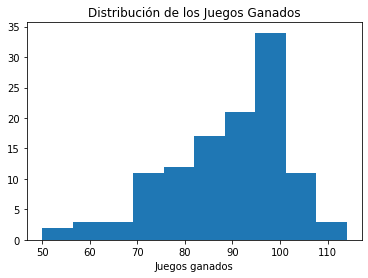

In [18]:
#Visualizar los juegos ganados
plt.hist(data_team['W'])
plt.xlabel('Juegos ganados')
plt.title('Distribución de los Juegos Ganados')
plt.show()

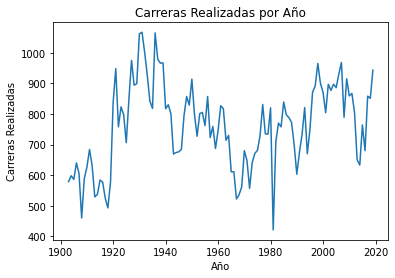

In [19]:
#Visualizar las carreras realizadas por cada año
plt.plot(data_team['yearID'], data_team['R'])
plt.title('Carreras Realizadas por Año')
plt.xlabel('Año')
plt.ylabel('Carreras Realizadas')
plt.show()

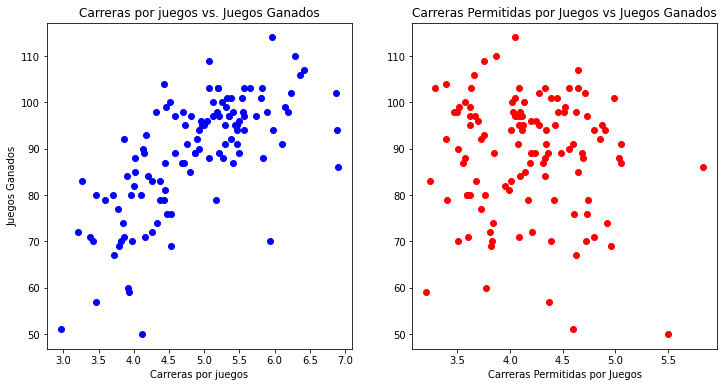

In [20]:
#Visualizar el número de carreras realizadas y permitidas por juegos ganados
#Determino el estimado de carreras realizadas por cada juego 
R_x_juego = data_team['R'] / data_team['G']
RA_x_juego = data_team['RA'] / data_team['G']

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.scatter(R_x_juego, data_team['W'], c='blue')
ax1.set_title('Carreras por juegos vs. Juegos Ganados')
ax1.set_ylabel('Juegos Ganados')
ax1.set_xlabel('Carreras por juegos')
ax2.scatter(RA_x_juego, data_team['W'], c='red')
ax2.set_title('Carreras Permitidas por Juegos vs Juegos Ganados')
ax2.set_xlabel('Carreras Permitidas por Juegos')
plt.show()

In [21]:
#Elimino las columnas que no son necesarias
data_team = data_team.drop(['yearID','teamID'], axis = 1)
data_team.head()

,G,W,R,AB,H,2B,3B,HR,BB,SO,...,IPouts,HA,HRA,BBA,SOA,E,DP,FP,era,decada
424,136,72,579,4565,1136,193,62,18,332.0,461.0,...,3604,1171,19,245,463,264,87,0.953,1.0,1910.0
440,155,92,598,5220,1354,195,91,27,312.0,552.0,...,4142,1180,29,311,684,275,90,0.958,1.0,1910.0
456,152,71,586,4957,1228,163,61,23,360.0,534.0,...,4061,1235,26,396,642,293,88,0.952,1.0,1910.0
472,155,90,640,5095,1354,166,77,17,331.0,537.0,...,4073,1236,21,351,605,272,69,0.957,1.0,1910.0
488,152,70,605,5044,1258,150,67,15,304.0,533.0,...,4001,1327,13,428,511,334,79,0.947,1.0,1910.0


### ANÁLISIS DE MACHINE LEARNING

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [24]:
#Declaramos cuales son las variables dependientes y las independientes
y = data_team['W']
X = data_team.drop('W', axis = 1)

In [25]:
#Separar los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)

In [26]:
#Definir el algoritmo - usaremos varios para comparar
algoritmoLR = LinearRegression()
algoritmoPol2 = LinearRegression()
algoritmoPol3 = LinearRegression()
poli_reg2 = PolynomialFeatures(degree=2)
poli_reg3 = PolynomialFeatures(degree=3)
svr1 = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr2 = SVR(kernel='rbf', degree=3, C=1.0, epsilon=0.1)
adr = DecisionTreeRegressor(max_depth=500)
bar = RandomForestRegressor(n_estimators=300, max_depth=10)

In [27]:
#Ajustar el orden de las variables de entrada para la regresión polinómica
X_train_poli2 = poli_reg2.fit_transform(X_train)
X_test_poli2 = poli_reg2.fit_transform(X_test)
X_train_poli3 = poli_reg3.fit_transform(X_train)
X_test_poli3 = poli_reg3.fit_transform(X_test)

In [28]:
#Entrenar el algoritmo
algoritmoLR.fit(X_train, y_train)
algoritmoPol2.fit(X_train_poli2, y_train)
algoritmoPol3.fit(X_train_poli3, y_train)
svr1.fit(X_train, y_train)
svr2.fit(X_train, y_train)
adr.fit(X_train, y_train)
bar.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=300)

In [29]:
#Realizar una predicción
y_test_predLR = algoritmoLR.predict(X_test)
y_test_predPol2 = algoritmoPol2.predict(X_test_poli2)
y_test_predPol3 = algoritmoPol3.predict(X_test_poli3)
y_test_predsvr1 = svr1.predict(X_test)
y_test_predsvr2 = svr2.predict(X_test)
y_test_predadr = adr.predict(X_test)
y_test_predBar = bar.predict(X_test)

In [30]:
#Calculo de la precisión del modelo
#Error promedio al cuadrado
rmse_rf = (mean_squared_error(y_test,y_test_predLR))**(1/2)
print("Error Promedio al cuadrado con Regresión Lineal: ", rmse_rf)
rmse_rf_bar = (mean_squared_error(y_test,y_test_predBar))**(1/2)
print("Error Promedio al cuadrado con Forest Decision Regression: ", rmse_rf_bar)
rmse_rf_Pol3 = (mean_squared_error(y_test,y_test_predPol3))**(1/2)
print("Error Promedio al cuadrado con Regresión Polinómica de orden 3: ", rmse_rf_Pol3)
rmse_rf_Pol2 = (mean_squared_error(y_test,y_test_predPol2))**(1/2)
print("Error Promedio al cuadrado con Regresión Polinómica de orden 2: ", rmse_rf_Pol2)
rmse_rf_adr = (mean_squared_error(y_test,y_test_predadr))**(1/2)
print("Error Promedio al cuadrado con Tree Decision Regression: ", rmse_rf_adr)
rmse_rf_svr1 = (mean_squared_error(y_test,y_test_predsvr1))**(1/2)
print("Error Promedio al cuadrado con Support Vector Regression: ", rmse_rf_svr1)

Error Promedio al cuadrado con Regresión Lineal:  3.1655412939588663
Error Promedio al cuadrado con Forest Decision Regression:  5.483085944458763
Error Promedio al cuadrado con Regresión Polinómica de orden 3:  6.607470802564126
Error Promedio al cuadrado con Regresión Polinómica de orden 2:  6.630992195663946
Error Promedio al cuadrado con Tree Decision Regression:  7.724420150837645
Error Promedio al cuadrado con Support Vector Regression:  10.129711321443473


In [31]:
#Calculo R2
print("R2 Regresión Lineal: ", r2_score(y_test, y_test_predLR))
print("R2 Forest Decision Regression: ", r2_score(y_test, y_test_predBar))
print("R2 Regresión Polinómica Orden 3: ", r2_score(y_test, y_test_predPol3))
print("R2 Regresión Polinomica Orden 2: ", r2_score(y_test, y_test_predPol2))
print("R2 Tree Decision Regression: ", r2_score(y_test, y_test_predadr))
print("R2 Support Vector Regression Kernel Lineal: ", r2_score(y_test, y_test_predsvr1))

R2 Regresión Lineal:  0.8984607809118806
R2 Forest Decision Regression:  0.6953592757510196
R2 Regresión Polinómica Orden 3:  0.557606886315517
R2 Regresión Polinomica Orden 2:  0.5544516022905013
R2 Tree Decision Regression:  0.3953979311800718
R2 Support Vector Regression Kernel Lineal:  -0.0397573295075877
